<h1><b>Medical Insurance Cost Prediction by Regression</b></h1>
<h3>By: Aditya Pothapragada</h3>

<h3><b>Step 0 - Package and Data Imports</b></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<h3><b>Step 1 - Data auditing</b></h3>

Stats of all numerical fields: age, bmi, children, charges. Most important stats are the average, standard deviation, min and max values, and the quartile values.

In [2]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data types of all columns

In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Checking for null values

In [4]:
df.isna().sum().sum()

np.int64(0)

Graph representing the distribution of smokers

Text(0, 0.5, '')

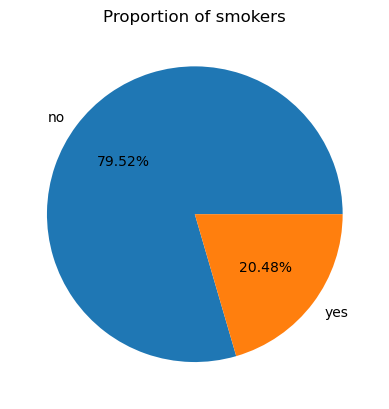

In [5]:
smoker_split = df['smoker'].value_counts(normalize = True) * 100
smoker_split.plot(kind = "pie", title = "Proportion of smokers", autopct = "%1.2f%%")
plt.ylabel("")

Graph representing the distribution of sex

Text(0, 0.5, '')

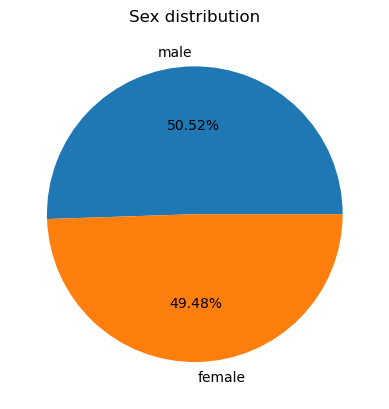

In [6]:
sex_split = df['sex'].value_counts(normalize = True) * 100
sex_split.plot(kind = "pie", title = "Sex distribution", autopct = "%1.2f%%")
plt.ylabel("")

Number of people in each region

In [7]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<h3><b>Step 2 - Explorative Data Analysis (EDA)</b></h3>

A histogram representing the distribution of charges. It is skewed to the right

Text(0.5, 1.0, 'Distribution of charges')

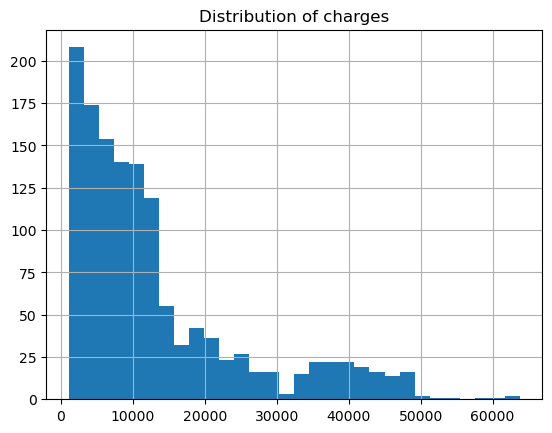

In [8]:
df['charges'].hist(bins = 30)
plt.title("Distribution of charges")

Taking the natural logarithm of the values instead standardizes the data and removes skewness. This makes it more suitable for data analysis.

Text(0.5, 1.0, 'Natural log of distribution of charges')

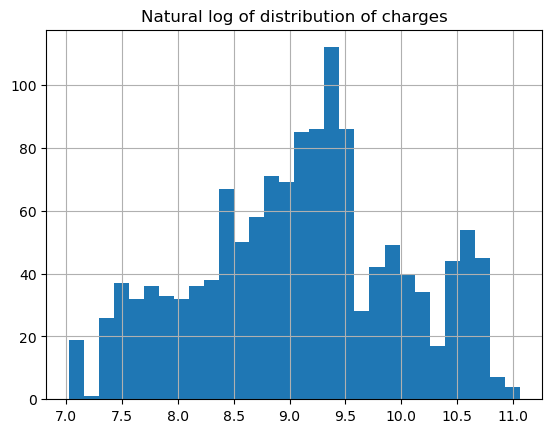

In [9]:
np.log(df['charges']).hist(bins = 30)
plt.title("Natural log of distribution of charges")

Histogram representing the distribution of ages. It is relatively symmetrical.

<Axes: >

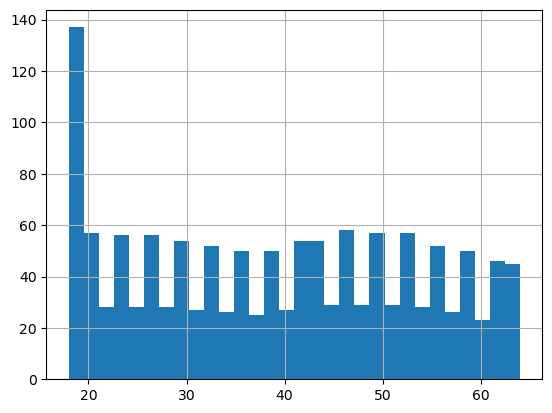

In [10]:
df['age'].hist(bins = 30)

Histogram representing the distribution of BMI. It is also relatively symmetrical.

<Axes: >

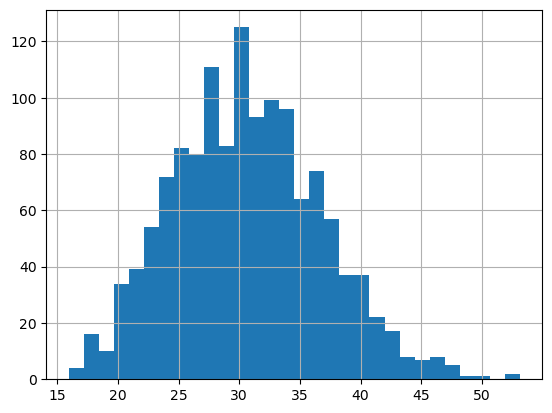

In [11]:
df['bmi'].hist(bins = 30)

This boxplot represents the relationship between smoking and charges. As seen in the graph, those who smoke tend to have higher charges than those who don't smoke.

Text(0.5, 1.0, 'Relationship between smoking and charges')

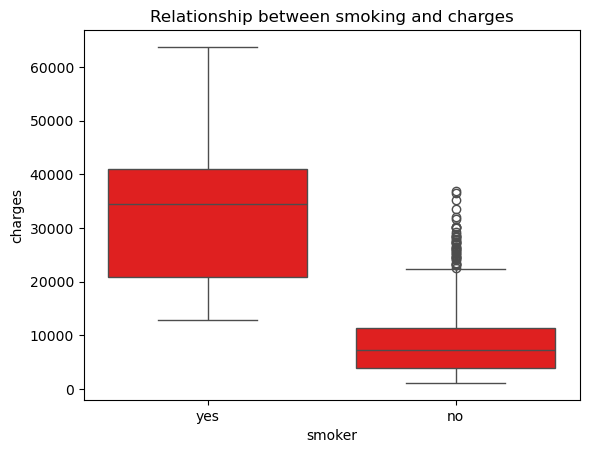

In [12]:
sns.boxplot(x = "smoker", y = "charges", data = df, color = "red")
plt.title("Relationship between smoking and charges")

This boxplot represents the relationship between sex and charges. As seen in the graph, there is no distinct relationship between the sex and the charges as both of them have similar average charge. However, it can be seen the males have a higher Q3 and max value of charges.

Text(0.5, 1.0, 'Relationship between sex and charges')

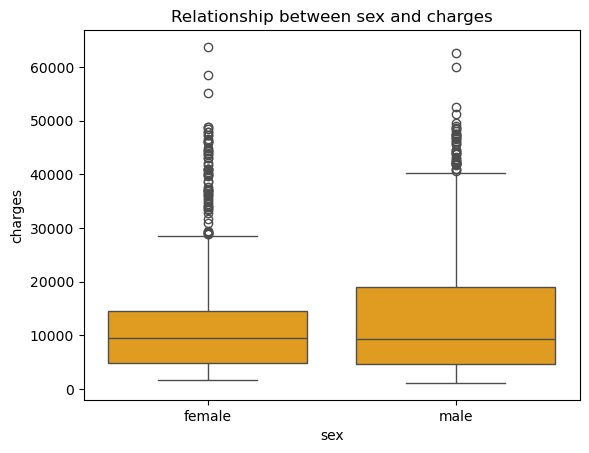

In [13]:
sns.boxplot(x = "sex", y = "charges", data = df, color = "orange")
plt.title("Relationship between sex and charges")

This boxplot represents the relationship between region and charges. As seen in the graph, there is no distinct relationship between the region and the charges as both of them have similar average charge.

Text(0.5, 1.0, 'Relationship between region and charges')

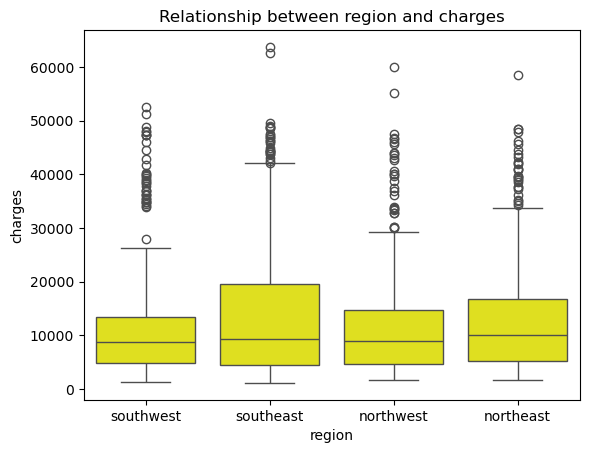

In [14]:
sns.boxplot(x = "region", y = "charges", data = df, color = "yellow")
plt.title("Relationship between region and charges")

This boxplot represents the relationship between number of children and charges. As seen in the graph, there is no distinct relationship between the number of children and the charges as both of them have similar average charge.

Text(0.5, 1.0, 'Relationship between number of children and charges')

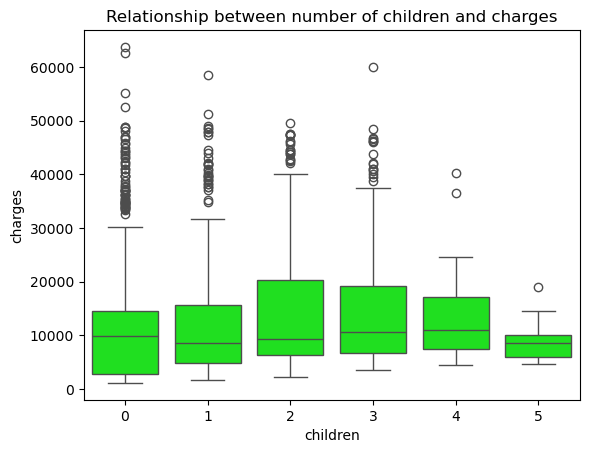

In [20]:
sns.boxplot(x = "children", y = "charges", data = df, color = "lime")
plt.title("Relationship between number of children and charges")

This scatterplot represents the relationship between age and charges. It can be observed that as the age increases, there is an increase in the minimal charge. There is a still a bit of scatter above this base charge, but a definite trend can be observed.

Text(0.5, 1.0, 'Relationship between age and log(charges)')

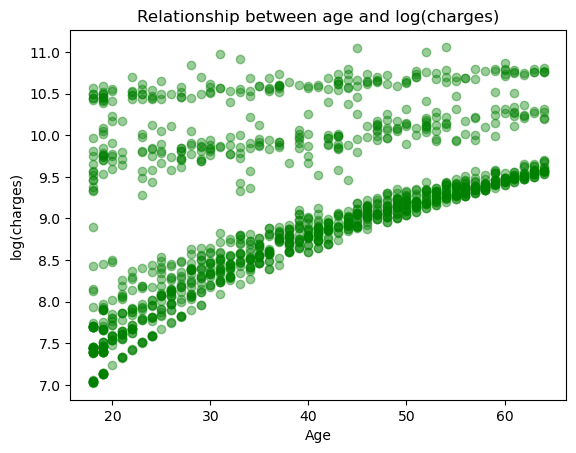

In [15]:
plt.scatter(df['age'], np.log(df['charges']), alpha = 0.4, c = 'green')
plt.ylabel("log(charges)")
plt.xlabel("Age")
plt.title("Relationship between age and log(charges)")

In the scatterplot below, we can see that BMI alone is not a great predictor due to a lot of scatter. There is no clear pattern. However, when you compare the low BMI smokers and the high BMI smokers, you can clearly see that high BMI smokers have higher charges than low BMI smokers.

Text(0, 0.5, 'log(charges)')

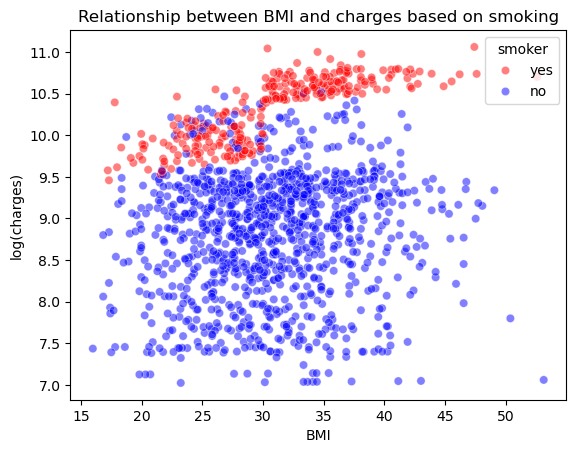

In [16]:
sns.scatterplot(x = df['bmi'], y = np.log(df['charges']), hue = df['smoker'], alpha = 0.5, palette = {"yes": "red", "no": "blue"})
plt.title("Relationship between BMI and charges based on smoking")
plt.xlabel("BMI")
plt.ylabel("log(charges)")

<b>In conclusion, smoking, age and high BMI smoking are the factors that greatly affect the charge.</b>